In [318]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np

In [319]:
df = pd.read_csv('adult.csv')

In [320]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [322]:
def print_null_data(data):
    null_count = data.isna().sum()
    null_perc = data.isna().sum() / len(data)
    null_perc = null_perc.apply(lambda x: f"{x:.1%}")
    result = pd.concat([null_count, null_perc], axis=1)
    result.columns = (['Null Count', 'Null Percentage'])
    print("Duplicated features count:", df.duplicated().sum())
    return result
print_null_data(df)

Duplicated features count: 52


,Null Count,Null Percentage
age,0,0.0%
workclass,0,0.0%
fnlwgt,0,0.0%
education,0,0.0%
educational-num,0,0.0%
marital-status,0,0.0%
occupation,0,0.0%
relationship,0,0.0%
race,0,0.0%
gender,0,0.0%


In [323]:
df.drop_duplicates(inplace=True)

In [324]:
print_null_data(df)

Duplicated features count: 0


,Null Count,Null Percentage
age,0,0.0%
workclass,0,0.0%
fnlwgt,0,0.0%
education,0,0.0%
educational-num,0,0.0%
marital-status,0,0.0%
occupation,0,0.0%
relationship,0,0.0%
race,0,0.0%
gender,0,0.0%


In [325]:
df['gender'].value_counts()

gender
Male      32614
Female    16176
Name: count, dtype: int64

In [326]:
import plotly_express as px
import seaborn as sns

In [327]:
fig = px.pie(df, names='income', hole=.3, title='Income pie (Reminder: data contain 32614 Male, 16176 Female)')
fig.update_traces(textposition='inside', textinfo='value+percent')
fig.show()

In [328]:
income_by_gender = df['gender'][df['income'] == '<=50K']
income_by_gender2 = df['gender'][df['income'] == '>50K']

In [329]:
fig = px.pie(income_by_gender, names='gender', hole=.3, title='Income <=50K for gender (Reminder: data contain 32614 Male, 16176 Female)')
fig.update_traces(textposition='inside', textinfo='value+percent')
fig.show()

In [330]:
fig = px.pie(income_by_gender2, names='gender', hole=.3, title='Income >50K for gender (Reminder: data contain 32614 Male, 16176 Female)')
fig.update_traces(textposition='inside', textinfo='value+percent')
fig.show()

In [331]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [332]:
#sns.pairplot(df)

In [333]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [335]:
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df['workclass']).add_prefix('workclass_')], axis=1)
df = pd.concat([df.drop('education', axis=1), pd.get_dummies(df['education']).add_prefix('education_')], axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df['occupation']).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df['relationship']).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df['race']).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

In [336]:
df['gender'] = [1 if each == 'Male' else 0 for each in df['gender']]
df['income'] = [1 if each == '<=50K' else 0 for each in df['income']]

In [337]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [338]:
X = df.drop('income', axis=1)
y = df['income']

In [339]:
from sklearn.model_selection import train_test_split

In [340]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [341]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [342]:
f1_scores = []
features = []
num_features_start = X.shape[1]

In [343]:
while X.shape[1] > 0:
    print(f'Training RF on the {X.shape[1]} most important features.') 
    y_pred = rf.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    features.append(rf.feature_importances_)
    
    least_important_idx = rf.feature_importances_.argmin()
    if least_important_idx >= X.shape[1]:
        break
    
    X = X.drop(X.columns[least_important_idx], axis=1)
    
    rf.fit(x_train, y_train)

Training RF on the 107 most important features.
Training RF on the 106 most important features.
Training RF on the 105 most important features.
Training RF on the 104 most important features.
Training RF on the 103 most important features.
Training RF on the 102 most important features.
Training RF on the 101 most important features.
Training RF on the 100 most important features.
Training RF on the 99 most important features.
Training RF on the 98 most important features.
Training RF on the 97 most important features.
Training RF on the 96 most important features.
Training RF on the 95 most important features.
Training RF on the 94 most important features.
Training RF on the 93 most important features.
Training RF on the 92 most important features.
Training RF on the 91 most important features.
Training RF on the 90 most important features.
Training RF on the 89 most important features.
Training RF on the 88 most important features.
Training RF on the 87 most important features.
Train

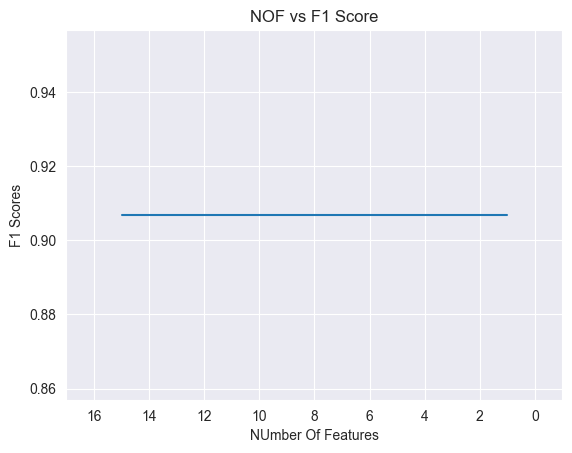

In [344]:
num_features = range(num_features_start, 0, -1)
plt.plot(num_features[-15:], f1_scores[-15:])
plt.xlabel("NUmber Of Features")
plt.ylabel("F1 Scores")
plt.title("NOF vs F1 Score")
plt.xlim(15+2, 1-2)
plt.show()

In [349]:
features[-6]

array([1.50335164e-01, 1.65531030e-01, 6.12270440e-02, 1.06387282e-02,
       9.99300179e-02, 2.99369571e-02, 8.49779830e-02, 1.75429004e-03,
       4.55064718e-03, 5.60333461e-03, 1.11987977e-06, 1.00437497e-02,
       6.05794553e-03, 8.28844201e-03, 4.42657457e-03, 6.20874546e-05,
       1.58429536e-03, 1.92324115e-03, 7.33152950e-04, 2.67182185e-04,
       6.54158922e-04, 1.88641049e-03, 9.32344971e-04, 2.54520615e-03,
       2.54323200e-03, 1.42013405e-02, 3.29401356e-03, 6.77380539e-03,
       7.42828790e-03, 5.44224775e-05, 5.24498474e-03, 5.05818547e-03,
       7.30161825e-03, 2.85513294e-04, 6.57982060e-02, 8.51324041e-04,
       2.21587177e-02, 1.85690608e-03, 1.72256331e-03, 1.98724383e-03,
       5.52734746e-03, 7.08690767e-05, 6.34419297e-03, 1.72687653e-02,
       4.08599169e-03, 2.82961799e-03, 3.60386502e-03, 5.79328735e-03,
       1.58797394e-04, 1.66340581e-02, 2.81196919e-03, 7.21222842e-03,
       4.46771860e-03, 4.55700899e-03, 4.32523960e-02, 1.11099723e-02,
      

In [353]:
f1_scores[-20]

0.9068679378531073